<a href="https://colab.research.google.com/github/Aya-Jafar/Traffic-jam-prediction/blob/main/Climate_capstone_project_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn 
from sklearn.experimental import enable_iterative_imputer
from sklearn import  model_selection, svm, metrics, pipeline, preprocessing,impute
import multiprocessing as mp
import tensorflow as tf
import requests 

# Reading the dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Chicago_Traffic_Tracker_-_Historical_Congestion_Estimates_by_Segment_-_2018-Current (1).csv')
df = df.sample(10000, random_state=42)
df

,TIME,SEGMENT_ID,SPEED,STREET,DIRECTION,FROM_STREET,TO_STREET,LENGTH,STREET_HEADING,COMMENTS,...,HOUR,DAY_OF_WEEK,MONTH,RECORD_ID,START_LATITUDE,START_LONGITUDE,END_LATITUDE,END_LONGITUDE,START_LOCATION,END_LOCATION
62477,05/25/2018 06:10:42 AM,1246,-1,Halsted,SB,51st,55th,0.50,S,NaN,...,6,6,5,1246-201805251110,41.801585,-87.645536,41.794301,-87.645350,POINT (-87.645536 41.801585),POINT (-87.64535 41.794301)
57968,07/03/2018 08:31:12 AM,643,15,Cicero,SB,Kinzie,Madison,0.51,N,NaN,...,8,3,7,0643-201807031331,41.887922,-87.745708,41.880497,-87.745441,POINT (-87.7457075823 41.8879223958),POINT (-87.7454413862 41.8804965805)
70015,06/11/2018 12:10:23 AM,1197,-1,Halsted,NB,107th,103rd,0.50,S,NaN,...,0,2,6,1197-201806110510,41.699640,-87.642417,41.706916,-87.642643,POINT (-87.642417 41.69964),POINT (-87.642643 41.706916)
111696,05/15/2018 09:10:36 AM,288,-1,Irving Park,EB,Kostner,Pulaski,0.53,W,NaN,...,9,3,5,0288-201805151410,41.953392,-87.738065,41.953511,-87.727618,POINT (-87.7380652196 41.9533921986),POINT (-87.727618462 41.9535105845)
150020,05/15/2018 12:20:43 PM,379,27,Western,SB,63rd,67th,0.50,S,NaN,...,12,3,5,0379-201805151720,41.779217,-87.683823,41.771979,-87.683628,POINT (-87.6838226552 41.7792170504),POINT (-87.6836275216 41.7719786518)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450374,05/25/2018 10:30:56 PM,597,45,Lake Shore Dr,NW,Belmont,Addison,0.62,N,NaN,...,22,6,5,0597-201805260330,41.940384,-87.638222,41.948649,-87.643175,POINT (-87.6382223471 41.9403841461),POINT (-87.643175157 41.9486486075)
246202,05/15/2018 08:10:31 PM,321,29,North,EB,Oak Park,Narragansett,0.50,W,IDOT Signals Possible,...,20,3,5,0321-201805160110,41.908899,-87.794805,41.908974,-87.784965,POINT (-87.794804754 41.9088985252),POINT (-87.7849651041 41.9089744604)
60103,05/25/2018 06:01:28 AM,1266,-1,Halsted,SB,Addison,Belmont,0.50,N,NaN,...,6,6,5,1266-201805251101,41.947316,-87.649676,41.939979,-87.649457,POINT (-87.649676 41.947316),POINT (-87.649457 41.939979)
391984,07/03/2018 10:50:30 AM,329,-1,Western,NB,103rd,99th,0.50,S,NaN,...,10,3,7,0329-201807031550,41.706375,-87.681437,41.713673,-87.681660,POINT (-87.6814372666 41.7063752847),POINT (-87.6816602454 41.713672748)


In [ ]:
df.LENGTH.unique()

array([0.5 , 0.51, 0.53, 0.31, 0.25, 0.49, 0.72, 0.45, 1.23, 0.84, 0.47,
       0.48, 0.77, 0.32, 0.6 , 0.54, 0.38, 0.65, 1.2 , 0.16, 1.  , 0.2 ,
       0.68, 0.79, 0.52, 0.67, 0.41, 0.42, 0.34, 0.88, 0.61, 0.96, 1.04,
       0.62, 0.63, 0.33, 0.23, 0.56, 0.24, 0.59, 0.78, 1.54, 0.91, 0.11,
       0.46, 0.12, 1.02, 0.4 , 0.37, 0.85, 1.01, 0.35, 0.64, 0.87, 0.27,
       0.3 , 0.07, 1.53, 0.75, 0.19, 0.8 , 0.15, 0.1 , 0.98, 0.43, 0.28,
       0.39, 1.19, 0.76, 0.55, 0.57, 0.08, 0.9 , 0.26, 0.29, 0.58, 0.18,
       1.05, 0.95, 0.17, 0.69, 0.13, 0.36, 0.66, 0.99])

In [ ]:
df.DAY_OF_WEEK.unique()

array([6, 3, 2, 4, 1, 5, 7])

In [ ]:
df.columns

Index(['TIME', 'SEGMENT_ID', 'SPEED', 'STREET', 'DIRECTION', 'FROM_STREET',
       'TO_STREET', 'LENGTH', 'STREET_HEADING', 'COMMENTS', 'BUS_COUNT',
       'MESSAGE_COUNT', 'HOUR', 'DAY_OF_WEEK', 'MONTH', 'RECORD_ID',
       'START_LATITUDE', 'START_LONGITUDE', 'END_LATITUDE', 'END_LONGITUDE',
       'START_LOCATION', 'END_LOCATION'],
      dtype='object')

<Axes: ylabel='Frequency'>

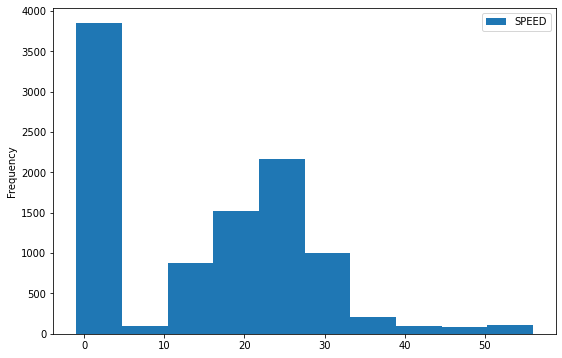

In [ ]:
df.plot(y='SPEED', figsize=(9,6),kind='hist')

In [ ]:
df.isna().sum()

TIME                  0
SEGMENT_ID            0
SPEED                 0
STREET                0
DIRECTION             0
FROM_STREET           0
TO_STREET             0
LENGTH                0
STREET_HEADING        0
COMMENTS           8763
BUS_COUNT             0
MESSAGE_COUNT         0
HOUR                  0
DAY_OF_WEEK           0
MONTH                 0
RECORD_ID             0
START_LATITUDE        0
START_LONGITUDE       0
END_LATITUDE          0
END_LONGITUDE         0
START_LOCATION        0
END_LOCATION          0
dtype: int64

# Data preprocessing 

## Feature selection

In [ ]:
df.drop(['COMMENTS','STREET_HEADING','RECORD_ID','START_LOCATION','END_LOCATION','MESSAGE_COUNT','SEGMENT_ID'],axis=1,inplace=True)

## Tokenization

In [ ]:
catogaries = df.select_dtypes(include=['object']).columns.tolist()
catogaries

['TIME', 'STREET', 'DIRECTION', 'FROM_STREET', 'TO_STREET']

In [ ]:
def tokenizer(col):
    word_id={}
    id_word = {}
    for id,word in enumerate(col.unique()):
        if pd.notna(word):
            word_id[word]=id 
            id_word[id] = word
    return word_id,id_word

In [ ]:
STREET_id,id_STREETT = tokenizer(df.STREET)
STREET_id

{'Halsted': 0,
 'Cicero': 1,
 'Irving Park': 2,
 'Western': 3,
 'Cermak': 4,
 'Garfield': 5,
 'Pulaski': 6,
 'Dr Martin L King Jr': 7,
 'Columbus': 8,
 'Archer': 9,
 '127th': 10,
 'Lake Shore Dr': 11,
 'Michigan': 12,
 'Washington': 13,
 'Stony Island': 14,
 'Peterson': 15,
 '87th': 16,
 '55th': 17,
 '79th': 18,
 'Chicago': 19,
 'Roosevelt': 20,
 '95th': 21,
 'LaSalle': 22,
 'Ashland': 23,
 'Wacker': 24,
 'Randolph': 25,
 'Cumberland': 26,
 'Clark': 27,
 'Touhy': 28,
 'Illinois': 29,
 'State': 30,
 'Pershing': 31,
 'North': 32,
 'Harlem': 33,
 'Caldwell': 34,
 'Grand': 35,
 'Jackson': 36,
 'Harrison': 37,
 'Milwaukee': 38,
 'Ontario': 39,
 '130th': 40,
 'Madison': 41,
 'Ohio': 42,
 '111th': 43,
 'Torrence': 44,
 'Ewing': 45,
 'Desplaines': 46,
 '57th': 47,
 'Fairbanks': 48,
 'Higgins': 49,
 'Broadway': 50,
 'Ridge': 51,
 'Congress': 52,
 'Jefferson': 53,
 'Elston': 54,
 'Monterey': 55,
 'Ramp To Cermak Rd': 56,
 'Sheridan': 57,
 'Warren': 58,
 'Indiana': 59,
 'Balbo': 60,
 'Hollywood':

In [ ]:
# Get the label to id and id to label dictdictionary 
direction_id,id_direction= tokenizer(df.DIRECTION)
# Convert the labels to ids using the label_id dictionary 
df['DIRECTION'].replace(direction_id,inplace=True)

FROM_STREET_id,id_FROM_STREET_id= tokenizer(df.FROM_STREET)
df['FROM_STREET'].replace(FROM_STREET_id,inplace=True)

TO_STREET_id,id_TO_STREET= tokenizer(df.TO_STREET)
df['TO_STREET'].replace(TO_STREET_id,inplace=True)

STREET_id,id_STREETT= tokenizer(df.STREET)
df['STREET'].replace(STREET_id,inplace=True)

In [ ]:
df

,TIME,SPEED,STREET,DIRECTION,FROM_STREET,TO_STREET,LENGTH,BUS_COUNT,HOUR,DAY_OF_WEEK,MONTH,START_LATITUDE,START_LONGITUDE,END_LATITUDE,END_LONGITUDE
62477,05/25/2018 06:10:42 AM,-1,0,0,0,0,0.50,0,6,6,5,41.801585,-87.645536,41.794301,-87.645350
57968,07/03/2018 08:31:12 AM,15,1,0,1,1,0.51,1,8,3,7,41.887922,-87.745708,41.880497,-87.745441
70015,06/11/2018 12:10:23 AM,-1,0,1,2,2,0.50,0,0,2,6,41.699640,-87.642417,41.706916,-87.642643
111696,05/15/2018 09:10:36 AM,-1,2,2,3,3,0.53,0,9,3,5,41.953392,-87.738065,41.953511,-87.727618
150020,05/15/2018 12:20:43 PM,27,3,0,4,4,0.50,1,12,3,5,41.779217,-87.683823,41.771979,-87.683628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450374,05/25/2018 10:30:56 PM,45,11,5,78,52,0.62,2,22,6,5,41.940384,-87.638222,41.948649,-87.643175
246202,05/15/2018 08:10:31 PM,29,32,2,95,103,0.50,1,20,3,5,41.908899,-87.794805,41.908974,-87.784965
60103,05/25/2018 06:01:28 AM,-1,0,0,60,59,0.50,0,6,6,5,41.947316,-87.649676,41.939979,-87.649457
391984,07/03/2018 10:50:30 AM,-1,3,1,80,121,0.50,0,10,3,7,41.706375,-87.681437,41.713673,-87.681660


In [ ]:
(df[df.SPEED == -1]).shape[0]

3838

In [ ]:
df.SPEED.replace(-1,np.nan,inplace=True)

In [ ]:
df.isna().sum()

TIME                  0
SPEED              3838
STREET                0
DIRECTION             0
FROM_STREET           0
TO_STREET             0
LENGTH                0
BUS_COUNT             0
HOUR                  0
DAY_OF_WEEK           0
MONTH                 0
START_LATITUDE        0
START_LONGITUDE       0
END_LATITUDE          0
END_LONGITUDE         0
dtype: int64

## Adding new features

### Day of month and minutes features 

In [ ]:
day_of_month = [str(i).split('/')[1] for i in df['TIME']]
df.insert(11, "DAY_OF_MONTH", day_of_month)

minuts = [str(i).split(':')[1] for i in df['TIME']]
df.insert(7, "MINUTE", minuts)
df

,TIME,SPEED,STREET,DIRECTION,FROM_STREET,TO_STREET,LENGTH,MINUTE,BUS_COUNT,HOUR,DAY_OF_WEEK,MONTH,DAY_OF_MONTH,START_LATITUDE,START_LONGITUDE,END_LATITUDE,END_LONGITUDE
62477,05/25/2018 06:10:42 AM,NaN,0,0,0,0,0.50,10,0,6,6,5,25,41.801585,-87.645536,41.794301,-87.645350
57968,07/03/2018 08:31:12 AM,15.0,1,0,1,1,0.51,31,1,8,3,7,03,41.887922,-87.745708,41.880497,-87.745441
70015,06/11/2018 12:10:23 AM,NaN,0,1,2,2,0.50,10,0,0,2,6,11,41.699640,-87.642417,41.706916,-87.642643
111696,05/15/2018 09:10:36 AM,NaN,2,2,3,3,0.53,10,0,9,3,5,15,41.953392,-87.738065,41.953511,-87.727618
150020,05/15/2018 12:20:43 PM,27.0,3,0,4,4,0.50,20,1,12,3,5,15,41.779217,-87.683823,41.771979,-87.683628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450374,05/25/2018 10:30:56 PM,45.0,11,5,78,52,0.62,30,2,22,6,5,25,41.940384,-87.638222,41.948649,-87.643175
246202,05/15/2018 08:10:31 PM,29.0,32,2,95,103,0.50,10,1,20,3,5,15,41.908899,-87.794805,41.908974,-87.784965
60103,05/25/2018 06:01:28 AM,NaN,0,0,60,59,0.50,01,0,6,6,5,25,41.947316,-87.649676,41.939979,-87.649457
391984,07/03/2018 10:50:30 AM,NaN,3,1,80,121,0.50,50,0,10,3,7,03,41.706375,-87.681437,41.713673,-87.681660


In [ ]:
df.drop(columns=['TIME'], inplace=True)

### Number of resturants,parks,shops features

In [ ]:
def search_places(ll , length):
  
    RADUIS = int(( length * 1600 ) // 2)

    CLIENT_ID = "S4FJMNBMU2ZEORB2EWZKAAU0UOPQX5LHR5SFXWQFDUXXWBYH"
    CLIENT_SECRET = "3L3EHFPASJQXDTVERNF44EBY1JBWNQOKHRB1FZQAQX2HXZG5"
    API_KEY = 'fsq399RuwPzWjtV+l+EsS5A3XxMqNPQHZFfeqmt4x+JYaSk='

    headers = {
          'Accept': 'application/json',
          'Authorization': API_KEY
    }

    VERSION = 20230316

    url =f'https://api.foursquare.com/v3/places/search?client_id={CLIENT_ID}&client_secret={CLIENT_SECRET}&v={VERSION}&ll={ll[0]},{ll[1]}&raduis={RADUIS}&query=restaurant,gas%20station,hospital,park,university,school&limit=50'


    response = requests.get(url,headers=headers)
    # print(response)

    places_counts = {
        'Resturants and Cafe\'s': 0,
        'College and University':0,
        'Hospitals':0,
        'Fuel station':0,
        'Parks':0,
        'Schools':0,
    }
    data = response.json()
    # print(data)
    # print(data['results'][0]['categories'])
   
    resturants_ids = [13000 , 13032 , 13037, 13065, 10020 , 10018 ,13034, 13035,13067, 13068, 13073, 13072]
    college_and_unis_ids = [12009 , 12013 , 12047 ]
    hospitals_ids = [15014 , 15000,15016 , 15033 , 15032 ,15045, 17035 ]
    fuel_stations_ids = [ 19007 ]
    parks_ids = [12000 , 19020 , 16032 ]
    schools_ids = [12009 , 12058 , 12057 , 12059 , 12060]


    try:
      if len(data['results']) :
            for i in data['results']:
              # print(i)
              if (len(i['categories'])):
                  if i['categories'][0]['id'] in resturants_ids:
                      places_counts['Resturants and Cafe\'s'] += 1

                  elif i['categories'][0]['id'] in college_and_unis_ids:
                    places_counts['College and University'] += 1
                  
                  elif i['categories'][0]['id'] in hospitals_ids:
                    places_counts['Hospitals'] += 1
                  
                  elif i['categories'][0]['id'] in fuel_stations_ids:
                    places_counts['Fuel station'] += 1
                  
                  elif i['categories'][0]['id'] in  parks_ids:
                    places_counts['Parks'] += 1

                  elif i['categories'][0]['id'] in schools_ids:
                    places_counts['Schools'] += 1
      else:
        return places_counts
    except:
        return np.nan
      
    return places_counts

In [ ]:
search_places([41.801585,	-87.645536		] , 0.50)

{"Resturants and Cafe's": 0,
 'College and University': 2,
 'Hospitals': 2,
 'Fuel station': 9,
 'Parks': 2,
 'Schools': 1}

In [ ]:
search_places([41.887922,	-87.745708		] , 0.50)

{"Resturants and Cafe's": 1,
 'College and University': 4,
 'Hospitals': 5,
 'Fuel station': 10,
 'Parks': 0,
 'Schools': 6}

In [ ]:
def process_chunk(start_coordinates):
    places_count = []
    for i in start_coordinates:
        places_counts = search_places([i[0],i[1]],i[2])
        places_count.append(places_counts)
    return places_count

# Get start coordinates and length from dataframe
start_coordinates = df[['START_LATITUDE', 'START_LONGITUDE', 'LENGTH']].to_numpy()

# Split the start_coordinates array into smaller chunks
num_processes = 4
chunk_size = len(start_coordinates) // num_processes
ll_chunks = [start_coordinates[i:i+chunk_size] for i in range(0, len(start_coordinates), chunk_size)]

# Create a multiprocessing pool
with mp.Pool(processes=num_processes) as pool:
    # Map each chunk to the process_chunk function
    results = pool.map(process_chunk, ll_chunks)

# Flatten the results list
places_count = [count for result in results for count in result]

places_count

[{"Resturants and Cafe's": 0,
  'College and University': 2,
  'Hospitals': 2,
  'Fuel station': 9,
  'Parks': 2,
  'Schools': 1},
 {"Resturants and Cafe's": 1,
  'College and University': 4,
  'Hospitals': 5,
  'Fuel station': 10,
  'Parks': 0,
  'Schools': 6},
 {"Resturants and Cafe's": 2,
  'College and University': 2,
  'Hospitals': 2,
  'Fuel station': 11,
  'Parks': 1,
  'Schools': 5},
 {"Resturants and Cafe's": 1,
  'College and University': 5,
  'Hospitals': 1,
  'Fuel station': 8,
  'Parks': 1,
  'Schools': 2},
 {"Resturants and Cafe's": 3,
  'College and University': 2,
  'Hospitals': 1,
  'Fuel station': 12,
  'Parks': 1,
  'Schools': 3},
 {"Resturants and Cafe's": 8,
  'College and University': 7,
  'Hospitals': 7,
  'Fuel station': 0,
  'Parks': 3,
  'Schools': 0},
 {"Resturants and Cafe's": 4,
  'College and University': 4,
  'Hospitals': 7,
  'Fuel station': 7,
  'Parks': 0,
  'Schools': 1},
 {"Resturants and Cafe's": 9,
  'College and University': 9,
  'Hospitals': 5,
 

In [ ]:
# create dataframe
start_places_count_df = pd.DataFrame(places_count)

start_places_count_df

,Resturants and Cafe's,College and University,Hospitals,Fuel station,Parks,Schools
0,0,2,2,9,2,1
1,1,4,5,10,0,6
2,2,2,2,11,1,5
3,1,5,1,8,1,2
4,3,2,1,12,1,3
...,...,...,...,...,...,...
9995,4,3,4,2,2,1
9996,2,4,2,4,0,8
9997,4,3,0,4,3,2
9998,2,1,3,9,2,9


In [ ]:
# Get start coordinates and length from dataframe
end_coordinates = df[['END_LATITUDE',	'END_LONGITUDE', 'LENGTH']].to_numpy()

# Split the end_coordinates array into smaller chunks
num_processes = 4
chunk_size = len(end_coordinates) // num_processes
ll_chunks = [end_coordinates[i:i+chunk_size] for i in range(0, len(end_coordinates), chunk_size)]

# Create a multiprocessing pool
with mp.Pool(processes=num_processes) as pool:
    # Map each chunk to the process_chunk function
    results = pool.map(process_chunk, ll_chunks)

# Flatten the results list
end_places_count = [count for result in results for count in result]

end_places_count

[{"Resturants and Cafe's": 0,
  'College and University': 2,
  'Hospitals': 1,
  'Fuel station': 9,
  'Parks': 2,
  'Schools': 0},
 {"Resturants and Cafe's": 3,
  'College and University': 4,
  'Hospitals': 5,
  'Fuel station': 9,
  'Parks': 0,
  'Schools': 4},
 {"Resturants and Cafe's": 1,
  'College and University': 2,
  'Hospitals': 2,
  'Fuel station': 11,
  'Parks': 1,
  'Schools': 5},
 {"Resturants and Cafe's": 1,
  'College and University': 5,
  'Hospitals': 1,
  'Fuel station': 8,
  'Parks': 1,
  'Schools': 2},
 {"Resturants and Cafe's": 5,
  'College and University': 1,
  'Hospitals': 1,
  'Fuel station': 11,
  'Parks': 1,
  'Schools': 3},
 {"Resturants and Cafe's": 8,
  'College and University': 6,
  'Hospitals': 7,
  'Fuel station': 0,
  'Parks': 3,
  'Schools': 0},
 {"Resturants and Cafe's": 4,
  'College and University': 4,
  'Hospitals': 6,
  'Fuel station': 7,
  'Parks': 0,
  'Schools': 1},
 {"Resturants and Cafe's": 8,
  'College and University': 9,
  'Hospitals': 5,
  

In [ ]:
end_places_count_df = pd.DataFrame(end_places_count)

end_places_count_df

,Resturants and Cafe's,College and University,Hospitals,Fuel station,Parks,Schools
0,0,2,1,9,2,0
1,3,4,5,9,0,4
2,1,2,2,11,1,5
3,1,5,1,8,1,2
4,5,1,1,11,1,3
...,...,...,...,...,...,...
9995,4,3,1,2,3,2
9996,1,4,3,5,0,7
9997,4,3,0,4,2,2
9998,2,0,3,8,2,8


In [ ]:
df = df.reset_index(drop=True)
df = pd.concat([df, end_places_count_df], axis=1)
df

,SPEED,STREET,DIRECTION,FROM_STREET,TO_STREET,LENGTH,MINUTE,BUS_COUNT,HOUR,DAY_OF_WEEK,...,START_LATITUDE,START_LONGITUDE,END_LATITUDE,END_LONGITUDE,Resturants and Cafe's,College and University,Hospitals,Fuel station,Parks,Schools
0,NaN,0,0,0,0,0.50,10,0,6,6,...,41.801585,-87.645536,41.794301,-87.645350,0,2,1,9,2,0
1,15.0,1,0,1,1,0.51,31,1,8,3,...,41.887922,-87.745708,41.880497,-87.745441,3,4,5,9,0,4
2,NaN,0,1,2,2,0.50,10,0,0,2,...,41.699640,-87.642417,41.706916,-87.642643,1,2,2,11,1,5
3,NaN,2,2,3,3,0.53,10,0,9,3,...,41.953392,-87.738065,41.953511,-87.727618,1,5,1,8,1,2
4,27.0,3,0,4,4,0.50,20,1,12,3,...,41.779217,-87.683823,41.771979,-87.683628,5,1,1,11,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,45.0,11,5,78,52,0.62,30,2,22,6,...,41.940384,-87.638222,41.948649,-87.643175,4,3,1,2,3,2
9996,29.0,32,2,95,103,0.50,10,1,20,3,...,41.908899,-87.794805,41.908974,-87.784965,1,4,3,5,0,7
9997,NaN,0,0,60,59,0.50,01,0,6,6,...,41.947316,-87.649676,41.939979,-87.649457,4,3,0,4,2,2
9998,NaN,3,1,80,121,0.50,50,0,10,3,...,41.706375,-87.681437,41.713673,-87.681660,2,0,3,8,2,8


In [ ]:
# Rename the columns to point that it's for the start coordinates features 
new_cols=['End_Resturants_Cafe\'s_count',
        'End_College_count', 
        'End_Hospitals_count',
        'End_Fuel_station_count',
        'End_Parks_count',
        'End_Schools_count']

new_cols = [i.upper() for i in new_cols]

df.rename(columns= dict(zip(df[df.columns[-6:]].columns, new_cols)),
          inplace=True)
df

,SPEED,STREET,DIRECTION,FROM_STREET,TO_STREET,LENGTH,MINUTE,BUS_COUNT,HOUR,DAY_OF_WEEK,...,START_LATITUDE,START_LONGITUDE,END_LATITUDE,END_LONGITUDE,END_RESTURANTS_CAFE'S_COUNT,END_COLLEGE_COUNT,END_HOSPITALS_COUNT,END_FUEL_STATION_COUNT,END_PARKS_COUNT,END_SCHOOLS_COUNT
0,NaN,0,0,0,0,0.50,10,0,6,6,...,41.801585,-87.645536,41.794301,-87.645350,0,2,1,9,2,0
1,15.0,1,0,1,1,0.51,31,1,8,3,...,41.887922,-87.745708,41.880497,-87.745441,3,4,5,9,0,4
2,NaN,0,1,2,2,0.50,10,0,0,2,...,41.699640,-87.642417,41.706916,-87.642643,1,2,2,11,1,5
3,NaN,2,2,3,3,0.53,10,0,9,3,...,41.953392,-87.738065,41.953511,-87.727618,1,5,1,8,1,2
4,27.0,3,0,4,4,0.50,20,1,12,3,...,41.779217,-87.683823,41.771979,-87.683628,5,1,1,11,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,45.0,11,5,78,52,0.62,30,2,22,6,...,41.940384,-87.638222,41.948649,-87.643175,4,3,1,2,3,2
9996,29.0,32,2,95,103,0.50,10,1,20,3,...,41.908899,-87.794805,41.908974,-87.784965,1,4,3,5,0,7
9997,NaN,0,0,60,59,0.50,01,0,6,6,...,41.947316,-87.649676,41.939979,-87.649457,4,3,0,4,2,2
9998,NaN,3,1,80,121,0.50,50,0,10,3,...,41.706375,-87.681437,41.713673,-87.681660,2,0,3,8,2,8


#### Merge the new dataset with the original

In [ ]:
# Merge the 2 datasets 
df = df.reset_index(drop=True)
df = pd.concat([df, start_places_count_df], axis=1)
df

,SPEED,STREET,DIRECTION,FROM_STREET,TO_STREET,LENGTH,MINUTE,BUS_COUNT,HOUR,DAY_OF_WEEK,...,END_HOSPITALS_COUNT,END_FUEL_STATION_COUNT,END_PARKS_COUNT,END_SCHOOLS_COUNT,Resturants and Cafe's,College and University,Hospitals,Fuel station,Parks,Schools
0,NaN,0,0,0,0,0.50,10,0,6,6,...,1,9,2,0,0,2,2,9,2,1
1,15.0,1,0,1,1,0.51,31,1,8,3,...,5,9,0,4,1,4,5,10,0,6
2,NaN,0,1,2,2,0.50,10,0,0,2,...,2,11,1,5,2,2,2,11,1,5
3,NaN,2,2,3,3,0.53,10,0,9,3,...,1,8,1,2,1,5,1,8,1,2
4,27.0,3,0,4,4,0.50,20,1,12,3,...,1,11,1,3,3,2,1,12,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,45.0,11,5,78,52,0.62,30,2,22,6,...,1,2,3,2,4,3,4,2,2,1
9996,29.0,32,2,95,103,0.50,10,1,20,3,...,3,5,0,7,2,4,2,4,0,8
9997,NaN,0,0,60,59,0.50,01,0,6,6,...,0,4,2,2,4,3,0,4,3,2
9998,NaN,3,1,80,121,0.50,50,0,10,3,...,3,8,2,8,2,1,3,9,2,9


In [ ]:
# Rename the columns to point that it's for the start coordinates features 
new_cols=['Start_Resturants_Cafe\'s_count',
        'Start_College_count', 
        'Start_Hospitals_count',
        'Start_Fuel_station_count',
        'Start_Parks_count',
        'Start_Schools_count']

new_cols = [i.upper() for i in new_cols]

df.rename(columns= dict(zip(df[df.columns[-6:]].columns, new_cols)),
          inplace=True)
df

,SPEED,STREET,DIRECTION,FROM_STREET,TO_STREET,LENGTH,MINUTE,BUS_COUNT,HOUR,DAY_OF_WEEK,...,END_HOSPITALS_COUNT,END_FUEL_STATION_COUNT,END_PARKS_COUNT,END_SCHOOLS_COUNT,START_RESTURANTS_CAFE'S_COUNT,START_COLLEGE_COUNT,START_HOSPITALS_COUNT,START_FUEL_STATION_COUNT,START_PARKS_COUNT,START_SCHOOLS_COUNT
0,NaN,0,0,0,0,0.50,10,0,6,6,...,1,9,2,0,0,2,2,9,2,1
1,15.0,1,0,1,1,0.51,31,1,8,3,...,5,9,0,4,1,4,5,10,0,6
2,NaN,0,1,2,2,0.50,10,0,0,2,...,2,11,1,5,2,2,2,11,1,5
3,NaN,2,2,3,3,0.53,10,0,9,3,...,1,8,1,2,1,5,1,8,1,2
4,27.0,3,0,4,4,0.50,20,1,12,3,...,1,11,1,3,3,2,1,12,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,45.0,11,5,78,52,0.62,30,2,22,6,...,1,2,3,2,4,3,4,2,2,1
9996,29.0,32,2,95,103,0.50,10,1,20,3,...,3,5,0,7,2,4,2,4,0,8
9997,NaN,0,0,60,59,0.50,01,0,6,6,...,0,4,2,2,4,3,0,4,3,2
9998,NaN,3,1,80,121,0.50,50,0,10,3,...,3,8,2,8,2,1,3,9,2,9


In [ ]:
# df.to_csv('processed-dataset.csv')

# Impute missing values

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Select rows with no null values
clean_df = df[~df['SPEED'].isnull()]

# Select rows with missing values 
missing_df = df[df.SPEED.isnull()]

X_train = clean_df.drop(columns=['SPEED'])
Y_train = clean_df.SPEED

# Train a linear regression model on the training data
model = RandomForestRegressor(random_state=1)
model.fit(X_train, Y_train)

X_test = missing_df.drop(columns=['SPEED'])

# Use the prediction to impute the missing values of the target column
y_test = model.predict(X_test)
missing_df['SPEED']= [int(i) for i in y_test]

# Merge the two datasets 
clean_df = pd.concat([clean_df, missing_df])
clean_df

<ipython-input-29-d77521307896>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_df['SPEED']= [int(i) for i in y_test]


,SPEED,STREET,DIRECTION,FROM_STREET,TO_STREET,LENGTH,MINUTE,BUS_COUNT,HOUR,DAY_OF_WEEK,...,END_HOSPITALS_COUNT,END_FUEL_STATION_COUNT,END_PARKS_COUNT,END_SCHOOLS_COUNT,START_RESTURANTS_CAFE'S_COUNT,START_COLLEGE_COUNT,START_HOSPITALS_COUNT,START_FUEL_STATION_COUNT,START_PARKS_COUNT,START_SCHOOLS_COUNT
1,15.0,1,0,1,1,0.51,31,1,8,3,...,5,9,0,4,1,4,5,10,0,6
4,27.0,3,0,4,4,0.50,20,1,12,3,...,1,11,1,3,3,2,1,12,1,3
5,25.0,4,2,5,5,0.31,10,2,19,3,...,7,0,3,0,8,7,7,0,3,0
8,27.0,5,2,8,8,0.72,30,1,5,2,...,2,5,3,2,0,2,1,9,2,0
12,35.0,9,2,11,12,0.50,50,1,1,4,...,0,9,1,3,6,0,0,7,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,23.0,43,2,114,51,0.41,01,0,3,2,...,3,8,1,4,3,1,2,10,1,4
9991,32.0,3,0,71,70,0.50,50,0,1,3,...,3,8,2,8,1,0,3,8,1,9
9994,25.0,20,2,52,51,0.50,30,0,1,4,...,6,1,3,0,3,9,9,5,4,0
9997,18.0,0,0,60,59,0.50,01,0,6,6,...,0,4,2,2,4,3,0,4,3,2


In [ ]:
(clean_df.SPEED.isna()).sum()

0

In [ ]:
clean_df['TIME_TAKEN'] = ((clean_df['LENGTH']) / clean_df['SPEED'])*60

In [ ]:
clean_df.to_csv('last-but-not-least.csv')